In [126]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns  # seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  # 自相关图
from statsmodels.tsa.stattools import adfuller as ADF  # 平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf  # 偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox  # 白噪声检验
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

%pylab inline

#jupyter中文显示是方框，加入下面两行即可显示中文，若嫌麻烦，也可去网上搜索如何永久显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (70, 20)  # 设置输出图片大小
sns.set(color_codes=True)  # seaborn设置背景
gold = pd.read_csv('LBMA-GOLD.csv')
bitcoin = pd.read_csv('BCHAIN-MKPRU.csv')
gold.Date=pd.to_datetime(gold.Date)
gold=gold.dropna(axis=0, how='any', inplace=False)
bitcoin.Date = pd.to_datetime(bitcoin.Date)
data = pd.merge(bitcoin, gold, on='Date', how='outer')
data[['gold', 'bitcoin']] = data[['gold', 'bitcoin']].astype('float')


Populating the interactive namespace from numpy and matplotlib


D:\python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


No handles with labels found to put in legend.


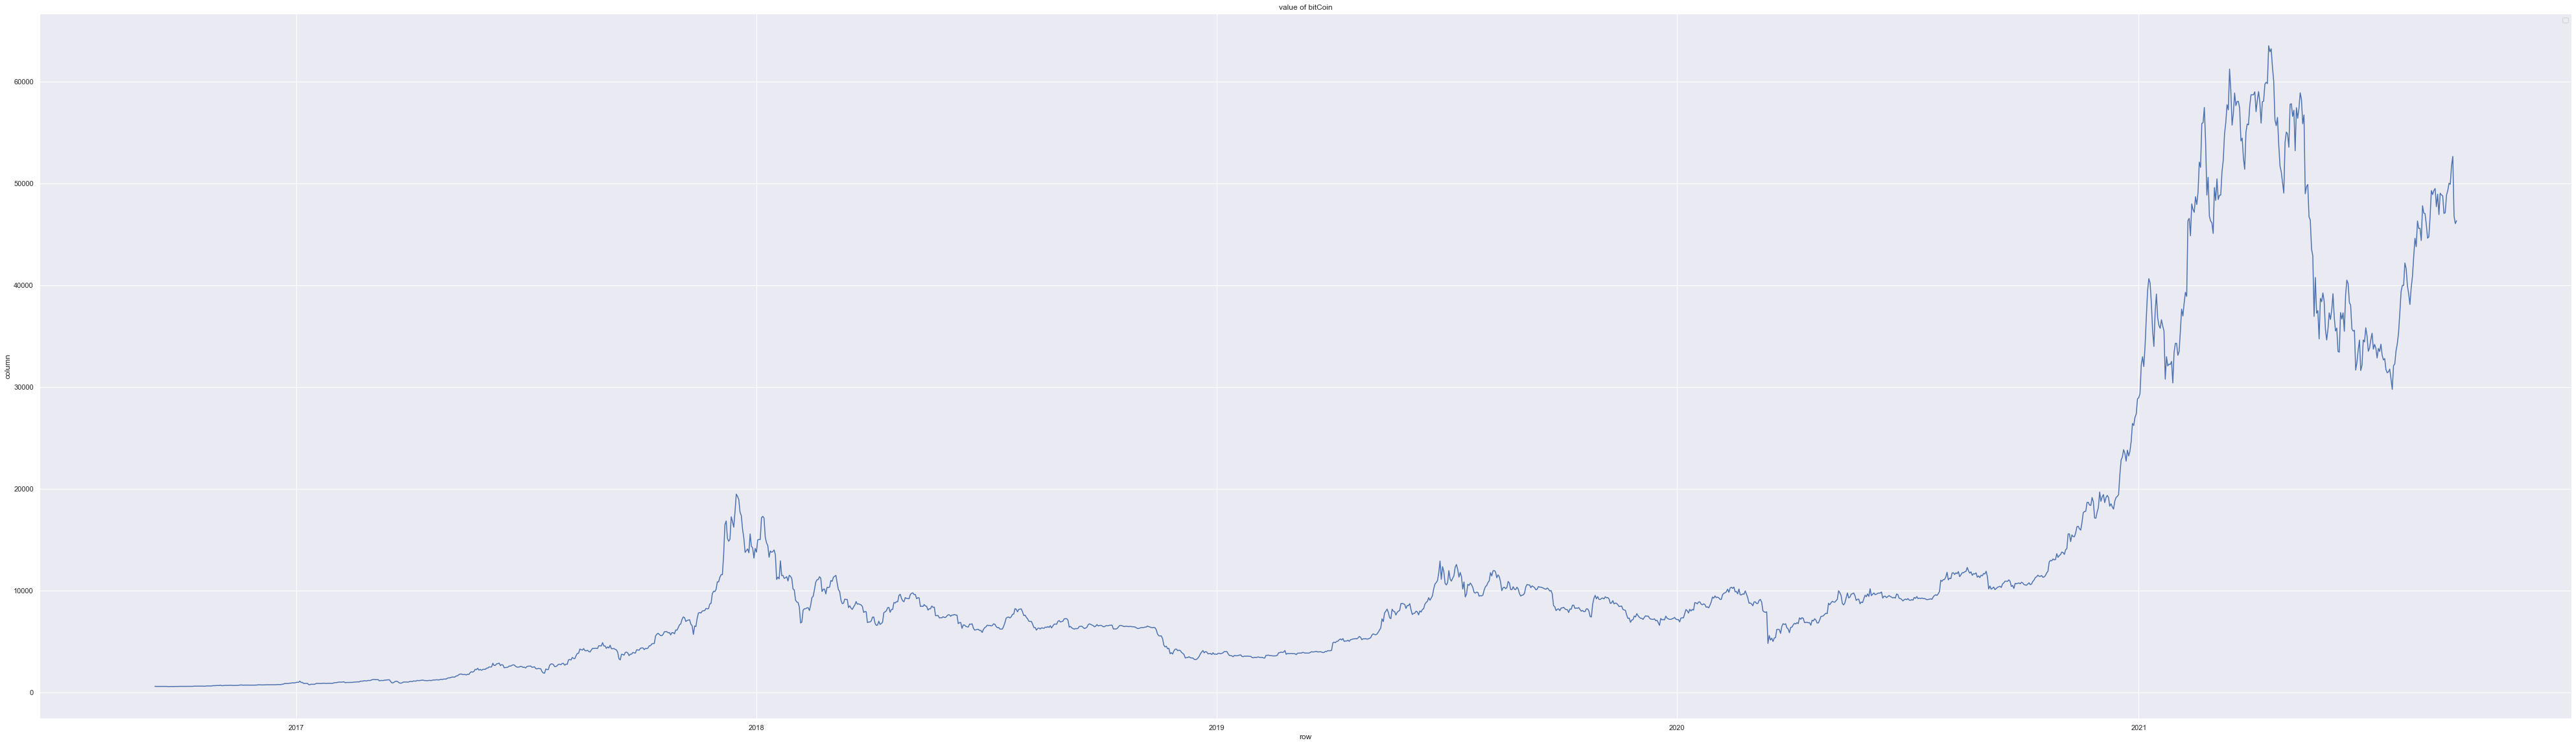

In [128]:

plt.plot(bitcoin.Date,bitcoin.bitcoin)
plt.title('value of bitCoin')
plt.xlabel('row')
plt.ylabel('column')
plt.legend()
plt.show() 


bitcoin原始序列的ADF检验结果为： (-0.23774252687897512, 0.9338707177253291, 24, 1801, {'1%': -3.4339861159726306, '5%': -2.863146142843122, '10%': -2.5676250581282964}, 29168.935944417746)
bitcoin一阶差分序列的PADF检验结果为： (-8.535405377369171, 1.0111831893571081e-13, 23, 1801, {'1%': -3.4339861159726306, '5%': -2.863146142843122, '10%': -2.5676250581282964}, 29151.81649615494)


<ipython-input-148-a65b781821e2>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(bitcoin.diff().dropna().bitcoin).show()
<ipython-input-148-a65b781821e2>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(bitcoin.diff().dropna().bitcoin).show()


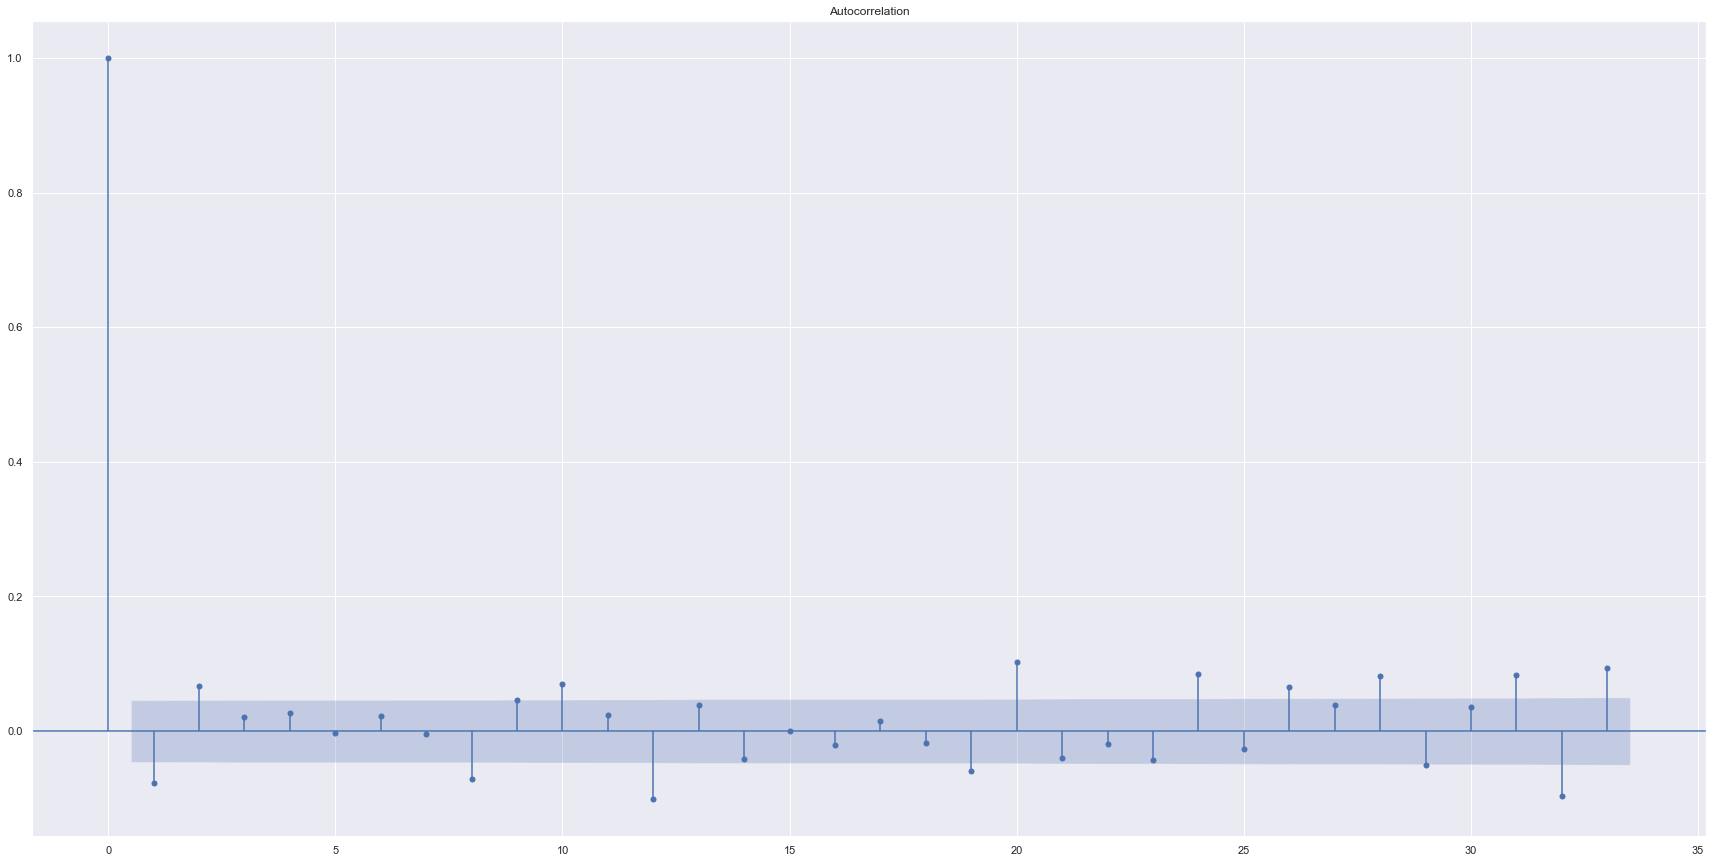

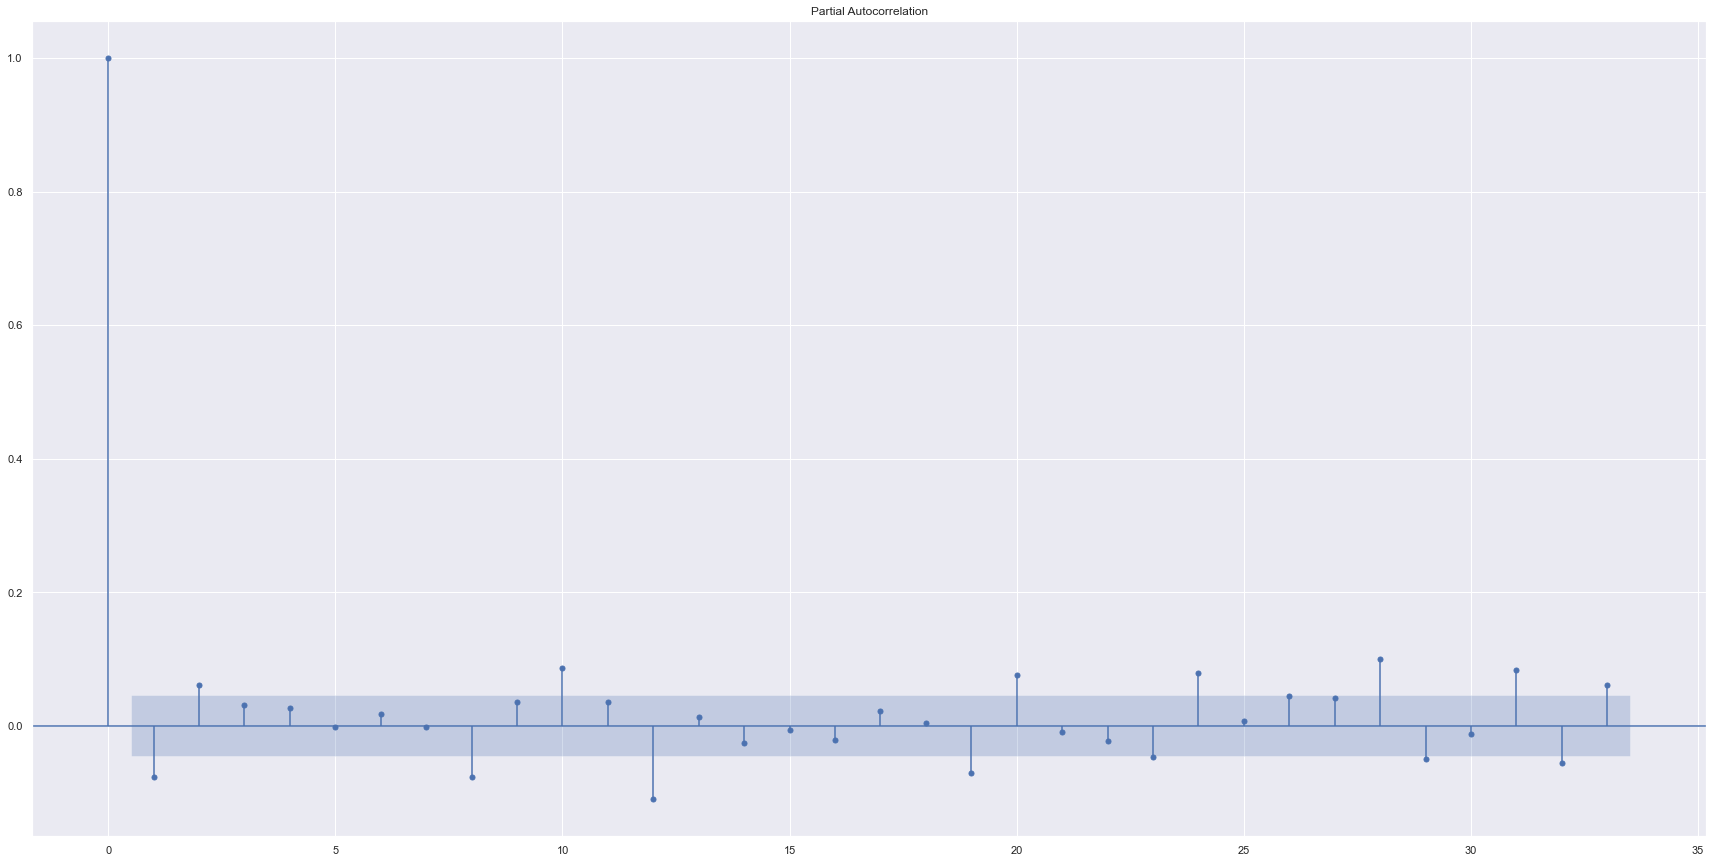

In [148]:
plt.rcParams['figure.figsize'] = (30, 15)  # 设置输出图片大小
# plot_acf(bitcoin.dropna().bitcoin).show()
print(u'bitcoin原始序列的ADF检验结果为：', ADF(bitcoin[u'bitcoin']))
plot_acf(bitcoin.diff().dropna().bitcoin).show()
print(u'bitcoin一阶差分序列的PADF检验结果为：', ADF(bitcoin.diff(1).dropna()[u'bitcoin']))
plot_pacf(bitcoin.diff().dropna().bitcoin).show()


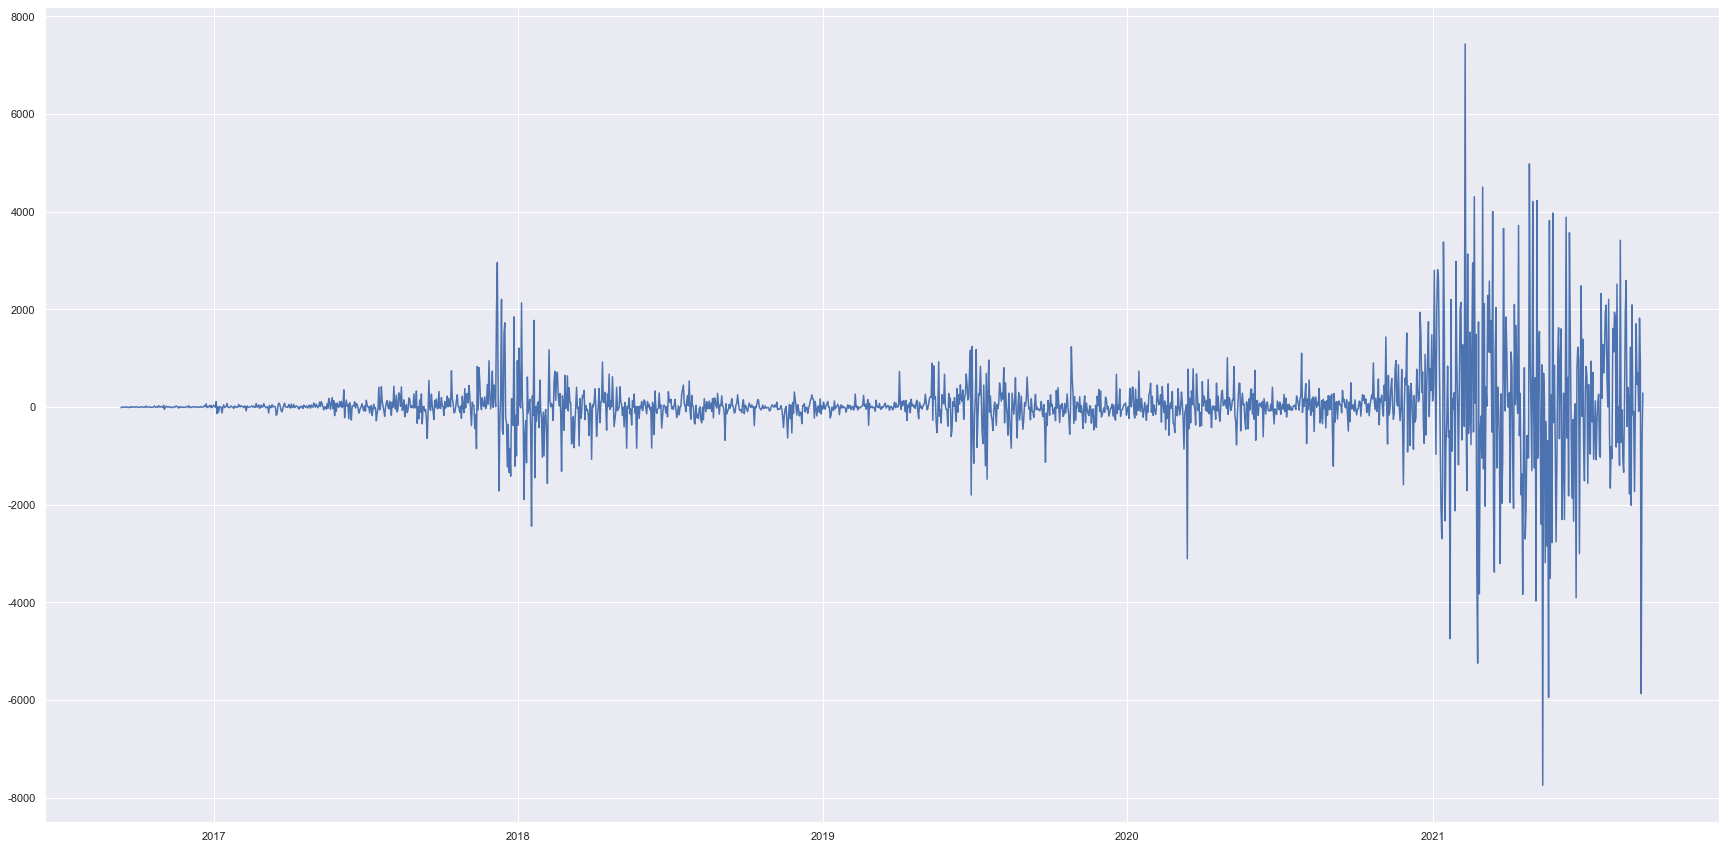

In [143]:
plt.plot(bitcoin.Date[1:],bitcoin.diff().dropna().bitcoin)
plt.show()

In [ ]:
#定阶
pmax = int(len(bitcoin)/10) #一般阶数不超过length/10
qmax = int(len(bitcoin)/10) #一般阶数不超过length/10
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try: #存在部分报错，所以用try来跳过报错。
            tmp.append(ARIMA(data, (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

p,q = bic_matrix.stack().idxmin() #先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC最小的p值和q值为：%s、%s' %(p,q))

# BIC最小的p值和q值为：0、1
model = ARIMA(data, (p,1,q)).fit() #建立ARIMA(0, 1, 1)模型
model.summary2() #给出一份模型报告